For this exercise, you will analyze a dataset from Amazon. 

**A. (Suggested duration: 90 mins)**
With the given data for 548552 products, perform exploratory analysis and make
suggestions for further analysis on the following aspects. 
1. Trustworthiness of ratings
Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively
speaking) about the ratings in this dataset?
2. Category bloat
Consider the product group named 'Books'. Each product in this group is associated with
categories. Naturally, with categorization, there are tradeoffs between how broad or
specific the categories must be.
For this dataset, quantify the following:
a. Is there redundancy in the categorization? How can it be identified/removed?
b. Is is possible to reduce the number of categories drastically (say to 10% of existing
categories) by sacrificing relatively few category entries (say close to 10%)?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [26]:
prod_reviews = {'id': [], 'asin': [], 'date': [], 'customer': [], 'rating': [], 'num_votes': [], 'helpfulness':[]}

with open('amazon-meta.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if line.startswith('Id'):
            Id = line.split()[1]
        elif line.startswith('ASIN'):
            ASIN = line.split()[1]
        elif line.startswith('    '):
            review = line.split()
            prod_reviews['id'].append(int(Id))
            prod_reviews['asin'].append(ASIN)
            prod_reviews['date'].append(review[0])
            prod_reviews['customer'].append(review[2])
            prod_reviews['rating'].append(int(review[4]))
            prod_reviews['num_votes'].append(int(review[6]))
            prod_reviews['helpfulness'].append(int(review[8]))

df = pd.DataFrame.from_dict(prod_reviews)
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.head()

,asin,customer,date,helpfulness,id,num_votes,rating
0,0827229534,A2JW67OY8U6HHK,2000-07-28,9,1,10,5
1,0827229534,A2VE83MZF98ITY,2003-12-14,5,1,6,5
2,0738700797,A11NCO6YTE4BTJ,2001-12-16,4,2,5,5
3,0738700797,A9CQ3PLRNIR83,2002-01-07,5,2,5,4
4,0738700797,A13SG9ACZ9O5IM,2002-01-24,8,2,8,5


In [37]:
df_asin=df.groupby('asin')['rating'].agg([np.size, np.min, np.max, np.mean]).sort_values(by='size', ascending=False).reset_index()
df_asin.head()

,asin,size,amin,amax,mean
0,043935806X,4995,1,5,4.366366
1,0786222727,4995,1,5,4.769169
2,0807220280,4995,1,5,4.369770
3,0807281956,4995,1,5,4.762563
4,0590353403,4995,1,5,4.765766


In [57]:
df_asin[(df_asin['size'] > 4500) & (df_asin['mean'] > 4.5)][['asin','size']]

,asin,size
1,0786222727,4995
3,0807281956,4995
4,0590353403,4995
5,0939173344,4995
6,043936213X,4995
7,0807281751,4995
8,0807286001,4995
11,0786229276,4924
12,0439139597,4924
13,0807282588,4924


In [61]:
df_asin[(df_asin['size'] > 4500) & (df_asin['mean'] < 4.5)][['asin','size']]

,asin,size
0,043935806X,4995
2,0807220280,4995
9,0807220299,4995
10,0439567629,4995


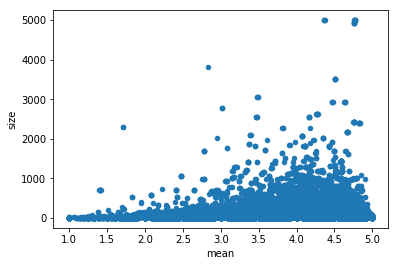

In [77]:
df_asin.plot(x='mean',y='size',kind='scatter')

The bigger the size of the reviews, the more scattered the reviews are.

Some people may tend to review negatively/postively at any product. 

In [29]:
df_customer = df.groupby(['customer', 'date'])['rating'].agg([np.size, np.min, np.max, np.mean]).sort_values(by='size', ascending=False).reset_index()
df_customer.head(10)

,customer,date,size,amin,amax,mean
0,ATVPDKIKX0DER,1998-08-22,4981,1,5,4.351737
1,ATVPDKIKX0DER,1999-11-08,2837,1,5,4.326049
2,ATVPDKIKX0DER,1999-11-16,2650,1,5,4.336981
3,ATVPDKIKX0DER,1999-11-03,2616,1,5,4.247706
4,ATVPDKIKX0DER,1999-11-02,2575,1,5,4.316505
5,ATVPDKIKX0DER,1999-06-29,2528,1,5,4.312104
6,ATVPDKIKX0DER,1999-04-14,2521,1,5,4.196747
7,ATVPDKIKX0DER,1999-11-04,2459,1,5,4.311509
8,ATVPDKIKX0DER,1999-07-06,2449,1,5,4.319314
9,ATVPDKIKX0DER,1999-10-24,2448,1,5,4.161765


One customer tops the size of reviewing thousands in a single data - that is not possible - and there is possibly some manipulation here!

In [30]:
df[df.customer=='ATVPDKIKX0DER'].groupby(['rating' ]).size()

rating
1     62922
2     37265
3     54623
4    134061
5    656194
dtype: int64

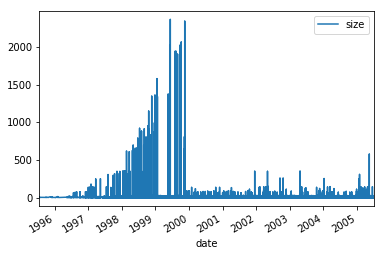

In [20]:
df_customer.loc[df.customer=='ATVPDKIKX0DER'].sort_values('date').plot(x='date', y='size')

In [32]:
df_customer = df.groupby(['customer', 'date'])['rating'].agg([np.size, np.min, np.max, np.mean]).sort_values(by='mean', ascending=True).reset_index()
df_customer.head(10)

,customer,date,size,amin,amax,mean
0,A27DL4HTOE74Y8,2003-05-07,1,1,1,1.0
1,A19FB2D3QTIOBH,2003-11-27,1,1,1,1.0
2,A28Y3135130ESJ,1999-08-31,1,1,1,1.0
3,A28Y2QSO5HYXC2,2004-02-15,1,1,1,1.0
4,A28Y0U9K6BD8OZ,2000-02-21,1,1,1,1.0
5,A28XZNSLZ7E79U,2004-04-21,3,1,1,1.0
6,A28XZMNN72SW5W,2001-08-05,2,1,1,1.0
7,AA6QOYAZKEEZQ,2002-03-26,1,1,1,1.0
8,A28XYSVJV8BY6C,2003-12-14,1,1,1,1.0
9,AA6RF8VTJQ1QU,2000-12-10,2,1,1,1.0


**Category Bloat**

In [82]:
books_categories = {'id': [], 'title': [], 'category_depth': [], 'category': []}

with open('amazon-meta.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if line.startswith('Id'):
            product_id = line.split()[1]
        elif line.startswith('  title'):
            pret, title = line.split(':', maxsplit=1)
            title = title.strip()
        elif line.startswith('  group'):
            group = line.split()[1]
        elif line.startswith('   |') and group=='Book':
            books_categories['id'].append(int(product_id))
            books_categories['title'].append(title)
            num_categ = line.split("|")[1:]
            books_categories['category_depth'].append(int(len(num_categ)))
            books_categories['category'].append(line)
df_books = pd.DataFrame.from_dict(books_categories)
df_books.head()

,category,category_depth,id,title
0,|Books[283155]|Subjects[1000]|Religion & Sp...,6,1,Patterns of Preaching: A Sermon Sampler
1,|Books[283155]|Subjects[1000]|Religion & Sp...,6,1,Patterns of Preaching: A Sermon Sampler
2,|Books[283155]|Subjects[1000]|Religion & Sp...,5,2,Candlemas: Feast of Flames
3,|Books[283155]|Subjects[1000]|Religion & Sp...,5,2,Candlemas: Feast of Flames
4,|Books[283155]|Subjects[1000]|Home & Garden...,5,3,World War II Allied Fighter Planes Trading Cards


In [71]:
df_books.shape

(1440329, 4)

There are 1440329 non-unique categories for books. Let's look at the unique categories.

In [103]:
df_books['category'].unique().shape[0]

12853

There are 12853 unique categories for books alone.

In [84]:
unique_categories = df_books.groupby(['category']).size().reset_index().sort_values(0,ascending=False).reset_index()
unique_categories.head()

,index,category,0
0,11878,|[265523]|Amazon.com Stores[285080]|Home & ...,18438
1,1877,|Books[283155]|Subjects[1000]|Business & In...,18436
2,8668,|Books[283155]|Subjects[1000]|Reference[21]...,13701
3,1605,|Books[283155]|Subjects[1000]|Biographies &...,12241
4,7829,|Books[283155]|Subjects[1000]|Nonfiction[53...,11779


In [98]:
unique_categories.rename(index=str,columns={0:'count'},inplace=True)

In [107]:
min_items = 100
rare_items = [v for v in unique_categories['count'] if v < min_items]
print('Number of rare-item categories: {}'.format(len(rare_items)))

Number of rare-item categories: 10324


In [109]:
print(len(rare_items)/df_books['category'].unique().shape[0])

0.8032365984595036


Removing or categorizing into rare item category would decrease the unique categories by 80%.

**B. (Suggested duration: 30 mins)**
Give the number crunching a rest! Just think about these problems.
1. Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?
2. Product thinking
Now, put on your 'product thinking' hat.
a. Is it a good idea to show users the categorization hierarchy for items?
b. Is it a good idea to show users similar/co-purchased items?
c. Is it a good idea to show users reviews and ratings for items?
d. For each of the above, why? How will you establish the same?

*We can start by clustering similar/co-purchased items. We can define some measurement of closeness between similar items, and merging/clustering is performed based on the value of closeness. We then evaluate the closeness with the next item and decide to merge or not. This hierarchical clustering represents categorization from specific to broad categories.*

*I believe people usually start shopping (especially online) with something specific. They do not start with hierarchical categories which a lot of times can be confusing. Two similar products (with slight difference) can be categorized under two completely different categories. It is good idea to use similar/co-purchased items (the famous "people who bought this bought those items" also recommendation) since it lets people explore items they would be interested in. Reviews and ratings are ok (if we know how to use them) especially when they are accompanied by rating of the reviewer by peer reviewers (helpfulness rating).*